# Naive Bayes Classifier

###### Importing libraries

In [1]:
import numpy as np
import pandas as pd
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

###### Loading Data from csv

In [2]:
#Load the dataset
df = pd.read_csv('C:/Users/anush/Documents/BitsPAIML/Course3Classification/Assignment2/liver_disease_1.csv')

#Print the first 5 rows of the dataframe.
df.head()

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,0.7,0.1,187,16,18,6.8,3.3,0.90,Yes
1,62,10.9,5.5,699,64,100,7.5,3.2,0.74,Yes
2,62,7.3,4.1,490,60,68,7.0,3.3,0.89,Yes
3,58,1.0,0.4,182,14,20,6.8,3.4,1.00,Yes
4,72,3.9,2.0,195,27,59,7.3,2.4,0.40,Yes


In [3]:
df.describe()

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio
count,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,579.000000
mean,44.746141,3.298799,1.486106,290.576329,80.713551,109.910806,6.483190,3.141852,0.947064
std,16.189833,6.209522,2.808498,242.937989,182.620356,288.918529,1.085451,0.795519,0.319592
min,4.000000,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000
25%,33.000000,0.800000,0.200000,175.500000,23.000000,25.000000,5.800000,2.600000,0.700000
50%,45.000000,1.000000,0.300000,208.000000,35.000000,42.000000,6.600000,3.100000,0.930000
75%,58.000000,2.600000,1.300000,298.000000,60.500000,87.000000,7.200000,3.800000,1.100000
max,90.000000,75.000000,19.700000,2110.000000,2000.000000,4929.000000,9.600000,5.500000,2.800000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 10 columns):
Age                           583 non-null int64
Total_Bilirubin               583 non-null float64
Direct_Bilirubin              583 non-null float64
Alkaline_Phosphotase          583 non-null int64
Alamine_Aminotransferase      583 non-null int64
Aspartate_Aminotransferase    583 non-null int64
Total_Protiens                583 non-null float64
Albumin                       583 non-null float64
Albumin_and_Globulin_Ratio    579 non-null float64
Dataset                       583 non-null object
dtypes: float64(5), int64(4), object(1)
memory usage: 45.7+ KB


In [5]:
df.isnull().sum()

Age                           0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    4
Dataset                       0
dtype: int64

###### Replacing missing values with mean

In [6]:
column="Albumin_and_Globulin_Ratio"
df[column] = df[column].replace(0,np.NaN)
mean = int(df[column].mean(skipna=True))
df[column]=df[column].replace(np.NaN, mean)

###### Replacing Outcome Yes - 1, No - 0

In [7]:
df.Dataset.replace(('Yes', 'No'), (1, 0), inplace=True)

In [8]:
df.head()

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 10 columns):
Age                           583 non-null int64
Total_Bilirubin               583 non-null float64
Direct_Bilirubin              583 non-null float64
Alkaline_Phosphotase          583 non-null int64
Alamine_Aminotransferase      583 non-null int64
Aspartate_Aminotransferase    583 non-null int64
Total_Protiens                583 non-null float64
Albumin                       583 non-null float64
Albumin_and_Globulin_Ratio    583 non-null float64
Dataset                       583 non-null int64
dtypes: float64(5), int64(5)
memory usage: 45.7 KB


In [10]:
df.isnull().sum()

Age                           0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    0
Dataset                       0
dtype: int64

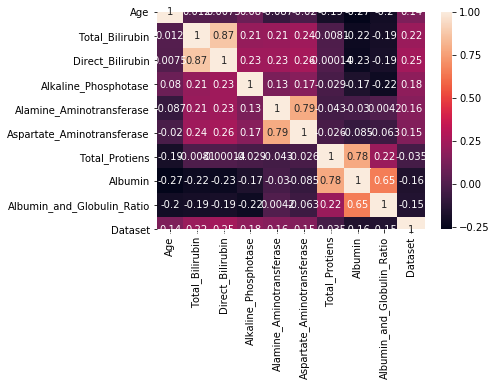

In [11]:

sns.heatmap(df.corr(),annot=True)

In [12]:
#importing train_test_split
from sklearn.model_selection import train_test_split

###### Splitting Features X and Labels y

In [13]:
X = df.iloc[:,0:9]
y = df.iloc[:,9]


###### Splitting Train and Test data at 70:30

In [14]:
#the proportion of labels should remain same in the splits, so we use "stratify"
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42, stratify=y)

In [15]:
#Import Library of Gaussian Naive Bayes model
from sklearn.naive_bayes import GaussianNB


###### Fitting Naive Bayes model

In [16]:
#Create a Gaussian Classifier
model = GaussianNB()

# Train the model using the training sets 
model.fit(X_train, y_train)


GaussianNB(priors=None, var_smoothing=1e-09)

In [17]:
#Predict on test data
y_pred= model.predict(X_test)
y_pred

array([0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0],
      dtype=int64)

###### Accuracy Measures

In [18]:
#import confusion_matrix
from sklearn.metrics import confusion_matrix

In [19]:
#Evaluate Results
cm=confusion_matrix(y_test,y_pred)
cm

array([[49,  1],
       [70, 55]], dtype=int64)

In [20]:
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
print(f1_score(y_test,y_pred))
print(accuracy_score(y_test,y_pred))

0.6077348066298341
0.5942857142857143


# Logistic Regression

###### Importing Libraries

In [21]:
#Load the necessary python libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')

###### Loading data from csv

In [22]:
#Load the dataset
dfLR = pd.read_csv('C:/Users/anush/Documents/BitsPAIML/Course3Classification/Assignment2/liver_disease_1.csv')

#Print the first 5 rows of the dataframe.
dfLR.head()

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,0.7,0.1,187,16,18,6.8,3.3,0.90,Yes
1,62,10.9,5.5,699,64,100,7.5,3.2,0.74,Yes
2,62,7.3,4.1,490,60,68,7.0,3.3,0.89,Yes
3,58,1.0,0.4,182,14,20,6.8,3.4,1.00,Yes
4,72,3.9,2.0,195,27,59,7.3,2.4,0.40,Yes


In [23]:
dfLR.describe()

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio
count,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,579.000000
mean,44.746141,3.298799,1.486106,290.576329,80.713551,109.910806,6.483190,3.141852,0.947064
std,16.189833,6.209522,2.808498,242.937989,182.620356,288.918529,1.085451,0.795519,0.319592
min,4.000000,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000
25%,33.000000,0.800000,0.200000,175.500000,23.000000,25.000000,5.800000,2.600000,0.700000
50%,45.000000,1.000000,0.300000,208.000000,35.000000,42.000000,6.600000,3.100000,0.930000
75%,58.000000,2.600000,1.300000,298.000000,60.500000,87.000000,7.200000,3.800000,1.100000
max,90.000000,75.000000,19.700000,2110.000000,2000.000000,4929.000000,9.600000,5.500000,2.800000


In [24]:
dfLR.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 10 columns):
Age                           583 non-null int64
Total_Bilirubin               583 non-null float64
Direct_Bilirubin              583 non-null float64
Alkaline_Phosphotase          583 non-null int64
Alamine_Aminotransferase      583 non-null int64
Aspartate_Aminotransferase    583 non-null int64
Total_Protiens                583 non-null float64
Albumin                       583 non-null float64
Albumin_and_Globulin_Ratio    579 non-null float64
Dataset                       583 non-null object
dtypes: float64(5), int64(4), object(1)
memory usage: 45.7+ KB


In [25]:
dfLR.isnull().sum()

Age                           0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    4
Dataset                       0
dtype: int64

In [26]:
#Replace missing values with mean

In [27]:
column="Albumin_and_Globulin_Ratio"
dfLR[column] = dfLR[column].replace(0,np.NaN)
mean = int(dfLR[column].mean(skipna=True))
dfLR[column]=dfLR[column].replace(np.NaN, mean)

In [28]:
#Replace outcome Yes-1, No-0

In [29]:
dfLR.Dataset.replace(('Yes', 'No'), (1, 0), inplace=True)

In [30]:
dfLR.head()

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [31]:
dfLR.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 10 columns):
Age                           583 non-null int64
Total_Bilirubin               583 non-null float64
Direct_Bilirubin              583 non-null float64
Alkaline_Phosphotase          583 non-null int64
Alamine_Aminotransferase      583 non-null int64
Aspartate_Aminotransferase    583 non-null int64
Total_Protiens                583 non-null float64
Albumin                       583 non-null float64
Albumin_and_Globulin_Ratio    583 non-null float64
Dataset                       583 non-null int64
dtypes: float64(5), int64(5)
memory usage: 45.7 KB


In [32]:
dfLR.isnull().sum()

Age                           0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    0
Dataset                       0
dtype: int64

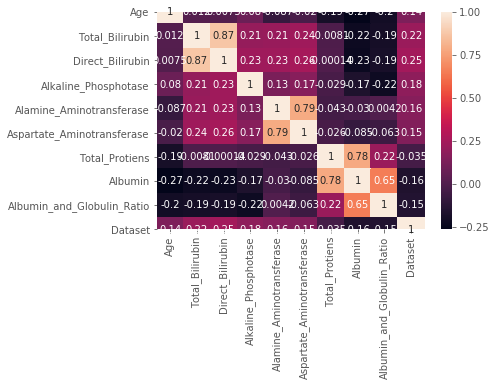

In [33]:
sns.heatmap(dfLR.corr(),annot=True)

###### Splitting Features and Labels

In [34]:
#importing train_test_split
from sklearn.model_selection import train_test_split

In [35]:
X = dfLR.iloc[:,0:9]
y = dfLR.iloc[:,9]


###### Splitting Dataset into Train and Test 70:30

In [36]:
#the proportion of labels should remain same in the splits, so we use "stratify"
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42, stratify=y)

###### Fitting and Predicting model

In [37]:
#Import Library of Logistic Regression
from sklearn.linear_model import LogisticRegression

In [38]:
# all parameters not specified are set to their defaults
logisticRegr = LogisticRegression(
    penalty='l2',
    solver='newton-cg',
    random_state=42
)

In [39]:
logisticRegr.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=42, solver='newton-cg', tol=0.0001, verbose=0,
                   warm_start=False)

In [40]:
logisticRegr_predict = logisticRegr.predict(X_test)

In [41]:
logisticRegr_predict

array([1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1],
      dtype=int64)

In [42]:
logisticRegr_predict_proba = logisticRegr.predict_proba(X_test)[:,1]

###### Accuracy Measures

In [43]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report

In [44]:
print('Accuracy:',format(accuracy_score(y_test, logisticRegr_predict)*100))

Accuracy: 74.28571428571429


In [45]:
print('AUC:',format(roc_auc_score(y_test, logisticRegr_predict_proba)*100))

AUC: 78.224


In [46]:
print('Classification_report:',classification_report(y_test, logisticRegr_predict))

Classification_report:               precision    recall  f1-score   support

           0       0.63      0.24      0.35        50
           1       0.76      0.94      0.84       125

    accuracy                           0.74       175
   macro avg       0.69      0.59      0.59       175
weighted avg       0.72      0.74      0.70       175



In [47]:
#import confusion_matrix
from sklearn.metrics import confusion_matrix

In [48]:
#Evaluate Results
cm=confusion_matrix(y_test, logisticRegr_predict)
cm

array([[ 12,  38],
       [  7, 118]], dtype=int64)

# Inference

Naive Bayes classifier is the generative model and logistic regression is the discriminative model. Naive Bayes assumes that the features are conditionally independent. Here some of the columns like (Total_Bilirubin and DIrect_Bilirubin), (Alamin_Aminotransferase and Aspartate_Aminotransferase) are highly correlated. Hence the Naive Bayes predictions might be poor when compared to Logistic Regression. In case of naive Bayes, Age and Albumin makes the output class 1 whereas in Logistic Regression, Albumin and Albumin_and Globulin_Ratio makes the output class1. Finally using Logistic Regression Algorithm will be the right approach for this dataset.